<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Roc_for_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
def ROC(mod,model_name,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=model_name[i]+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title(graph_feat["Title"],fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [62]:
def ROC_tt(mod,model_name,X,y,X_t,y_t,graph_feat):

  r_probs = [0 for _ in range(len(y_t))]
  test_r_probs = [0 for _ in range(len(y))]

  model_probs = []
  test_model_probs = []

  for i in mod:
    model_probs.append(i.predict_proba(X_t))
    test_model_probs.append(i.predict_proba(X))


  model_probs2=[]
  for i in model_probs:
    model_probs2.append(i[:,1])


  test_model_probs2=[]
  for i in test_model_probs:
    test_model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  test_model_auc=[]
  test_r_auc = roc_auc_score(y, test_r_probs)
  for i in test_model_probs2:
    test_model_auc.append(roc_auc_score(y,i))



  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  test_fpr_tpr=[]
  test_r_fpr, test_r_tpr, _ = roc_curve(y, test_r_probs)

  for i in test_model_probs2:
    test_fpr, test_tpr, _ = roc_curve(y, i)
    test_fpr_tpr.append((test_fpr,test_tpr))

  import matplotlib.pyplot as plt
  plt.plot(test_r_fpr, test_r_tpr, linestyle='--', label='Random prediction for Testing (AUROC = %0.3f)' % r_auc)
  plt.plot(test_r_fpr, test_r_tpr, linestyle='--', label='Random prediction for Training (AUROC = %0.3f)' % test_r_auc)


  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=model_name[i]+' Testing (AUROC = %0.3f)' % model_auc[i])
  
  for i in range(len(test_model_auc)):
    plt.plot(test_fpr_tpr[i][0], test_fpr_tpr[i][1], marker='.', label=model_name[i]+' Training (AUROC = %0.3f)' % test_model_auc[i])
   

  # Title
  plt.title(graph_feat["Title"],fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [63]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))

In [64]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from joblib import Parallel, delayed
import joblib
  

def save_model(model,model_name):
 joblib.dump(model, model_name)
  
def load_model(model_name):
  return joblib.load(model_name)

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [67]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [68]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
new_dataset=balance(X_train,y_train)

X_train = new_dataset.loc[:, new_dataset.columns!=target]
y_train = new_dataset[target]

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = load_model("/content/drive/MyDrive/MLModel_NREM_REM/RandomForestClassifier(max_depth=39, n_estimators=450, random_state=0)")

In [71]:
y_pred_train=rf.predict(X_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))
print("Accurecy: ",accuracy_score(y_train, y_pred_train))

[[58171     0]
 [ 1142 57029]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58171
           1       1.00      0.98      0.99     58171

    accuracy                           0.99    116342
   macro avg       0.99      0.99      0.99    116342
weighted avg       0.99      0.99      0.99    116342

Accurecy:  0.9901841123583917


In [72]:

y_pred_test=rf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test, y_pred_test))

[[13664   796]
 [  533  2827]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14460
           1       0.78      0.84      0.81      3360

    accuracy                           0.93     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9254208754208754


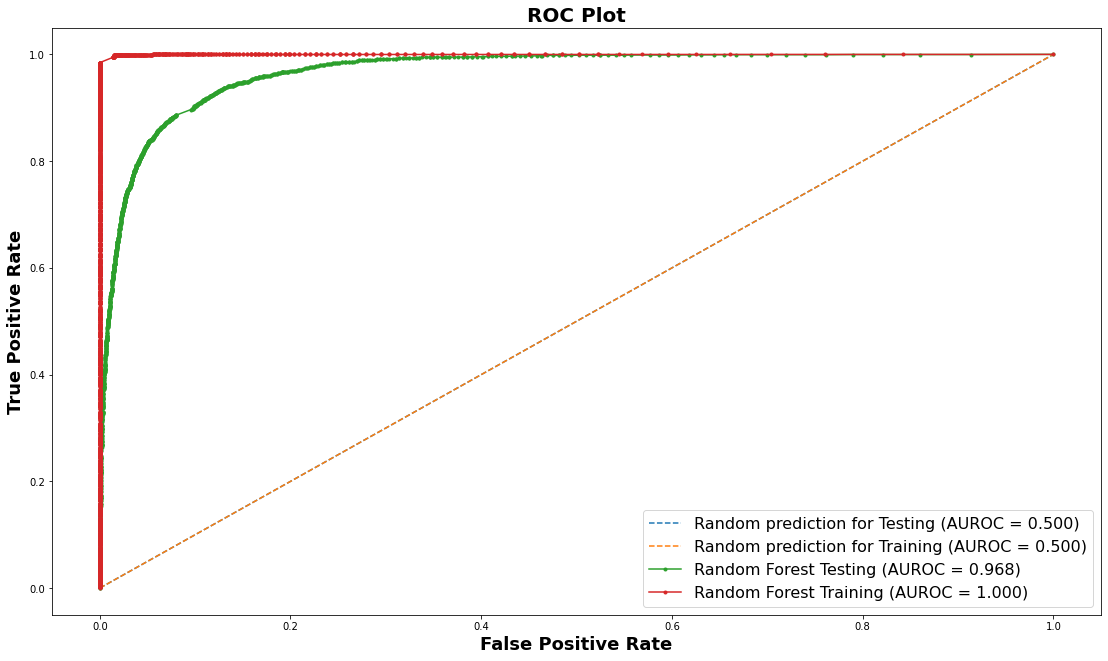

In [73]:
graph_feat={
    "Title" : "ROC Plot",
    "Title Size":20,
    "Title Fontweight":'bold',

    "legend Font Size": 16,
    "legend Position": "lower right",

    "X axis Label Font Size":18,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":18,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_RF_.png",
    "dpi":100
    

}



mod=[rf]
model_name=["Random Forest"]


ROC_tt(mod,model_name,X_train,y_train,X_test,y_test,graph_feat)

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gb=load_model("/content/drive/MyDrive/MLModel_NREM_REM/GradientBoostingClassifier(max_depth=12, n_estimators=1150, random_state=0)")

In [75]:
y_pred_train=gb.predict(X_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))
print("Accurecy: ",accuracy_score(y_train, y_pred_train))

[[58171     0]
 [  633 57538]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58171
           1       1.00      0.99      0.99     58171

    accuracy                           0.99    116342
   macro avg       0.99      0.99      0.99    116342
weighted avg       0.99      0.99      0.99    116342

Accurecy:  0.9945591445909474


In [76]:
y_pred_test=gb.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test, y_pred_test))

[[14032   428]
 [  596  2764]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14460
           1       0.87      0.82      0.84      3360

    accuracy                           0.94     17820
   macro avg       0.91      0.90      0.90     17820
weighted avg       0.94      0.94      0.94     17820

Accurecy:  0.9425364758698092


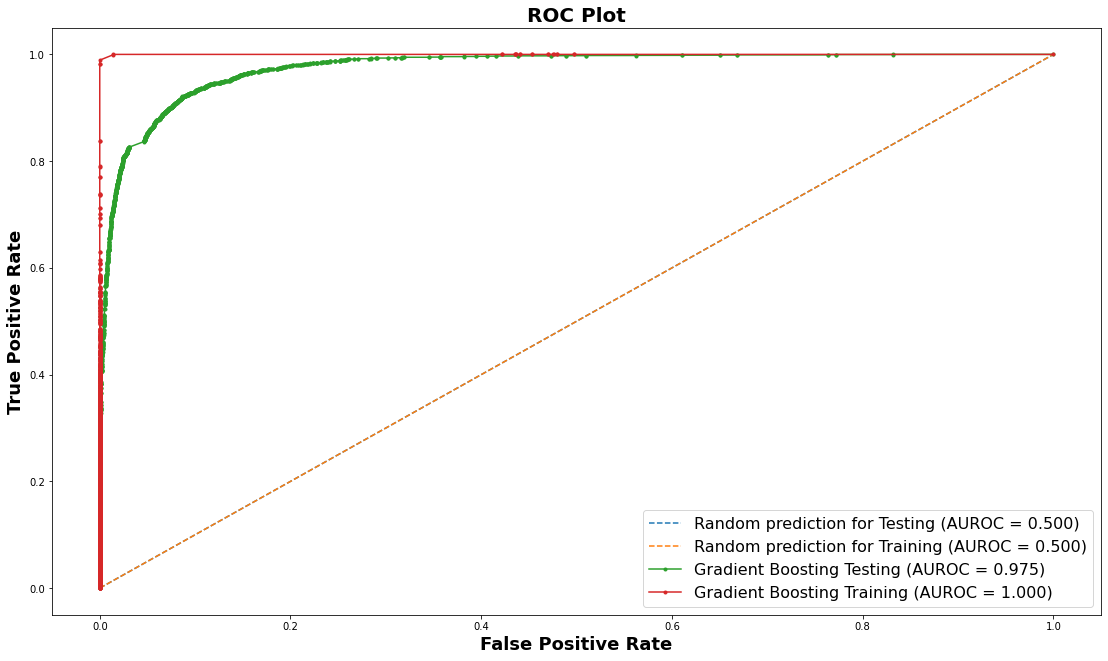

In [77]:

graph_feat={
    "Title" : "ROC Plot",
    "Title Size":20,
    "Title Fontweight":'bold',

    "legend Font Size": 16,
    "legend Position": "lower right",

    "X axis Label Font Size":18,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":18,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_GB_.png",
    "dpi":100
    

}





mod=[gb]
model_name=["Gradient Boosting"]


ROC_tt(mod,model_name,X_train,y_train,X_test,y_test,graph_feat)

In [78]:
import xgboost as xgb
xgb =  load_model("/content/drive/MyDrive/MLModel_NREM_REM/XGBClassifier(max_depth=29, n_estimators=4010)")

In [79]:
y_pred_test = xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test, y_pred_test))

[[14037   423]
 [  594  2766]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14460
           1       0.87      0.82      0.84      3360

    accuracy                           0.94     17820
   macro avg       0.91      0.90      0.90     17820
weighted avg       0.94      0.94      0.94     17820

Accurecy:  0.942929292929293


In [80]:
y_pred_train = xgb.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))
print("Accurecy: ",accuracy_score(y_train, y_pred_train))

[[58171     0]
 [  617 57554]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58171
           1       1.00      0.99      0.99     58171

    accuracy                           0.99    116342
   macro avg       0.99      0.99      0.99    116342
weighted avg       0.99      0.99      0.99    116342

Accurecy:  0.9946966701621083


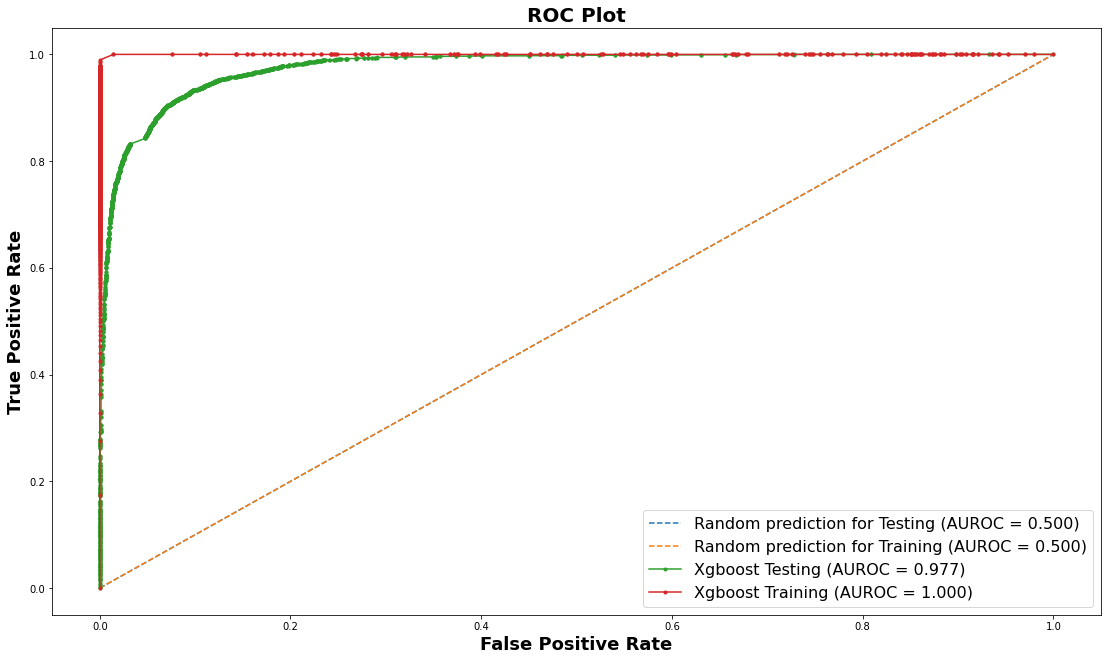

In [81]:
graph_feat={
    "Title" : "ROC Plot",
    "Title Size":20,
    "Title Fontweight":'bold',

    "legend Font Size": 16,
    "legend Position": "lower right",

    "X axis Label Font Size":18,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":18,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_XG_.png",
    "dpi":100
    

}




mod=[xgb]
model_name=["Xgboost"]


ROC_tt(mod,model_name,X_train,y_train,X_test,y_test,graph_feat)